<a href="https://colab.research.google.com/github/Rohan-1103/Data-Science/blob/main/regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

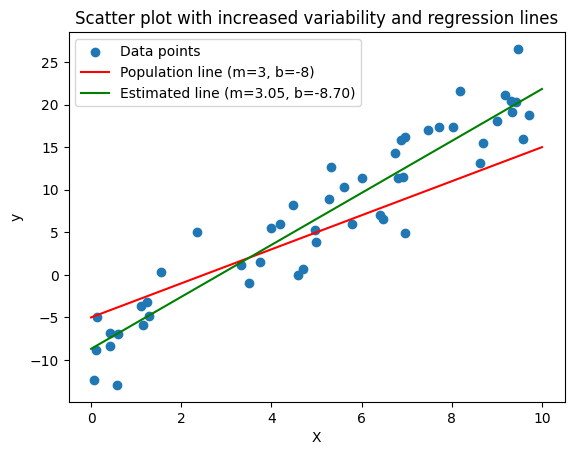

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate the data
x = 10 * np.random.rand(50)
y = 3 * x - 8 + np.random.randn(50) * 4

# Fit a linear regression model
x = x.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)

# Calculate the predicted values
y_pred = model.predict(x)

# Plot the scatter plot and regression lines
plt.scatter(x, y, label="Data points")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter plot with increased variability and regression lines")

# Plot the actual population line
x_line = np.linspace(0, 10, 100)
y_actual = 2 * x_line - 5
plt.plot(x_line, y_actual, 'r', label="Population line (m=3, b=-8)")

# Plot the estimated regression line
y_estimated = model.coef_[0] * x_line + model.intercept_
plt.plot(x_line, y_estimated, 'g', label=f"Estimated line (m={model.coef_[0]:.2f}, b={model.intercept_:.2f})")

# Add legend and show the plot
plt.legend()
plt.show()


### `sm.add_constant(X)` — Short Explanation

`sm.add_constant(X)` adds an **intercept (bias) term** to the regression model by inserting a column of **1s** into the feature matrix.

#### Why it is needed
- Allows the model to learn **baseline value** when all features are 0
- Prevents forcing the regression line through the origin

#### Example

**Before**
| TV | Radio | Newspaper |
|----|-------|-----------|
| 230.1 | 37.8 | 69.2 |

**After `sm.add_constant(X)`**
| const | TV | Radio | Newspaper |
|------|----|-------|-----------|
| 1.0 | 230.1 | 37.8 | 69.2 |

#### Model equation
\[
Y = \beta_0 + \beta_1 TV + \beta_2 Radio + \beta_3 Newspaper
\]

#### Note
- `statsmodels` ❌ does **not** add intercept automatically  
- `scikit-learn` ✅ adds intercept by default


In [2]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
url = "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv"
data = pd.read_csv(url, index_col=0)

# Define the independent variables (add a constant for the intercept)
X = data[['TV', 'Radio', 'Newspaper']]
X = sm.add_constant(X)

# Define the dependent variable
y = data['Sales']

# Fit the model using the independent and dependent variables
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 17 Dec 2025   Prob (F-statistic):           1.58e-96
Time:                        02:20:24   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0


# How a Professional Data Scientist Reads an OLS Regression Summary

A professional data scientist reads an OLS summary in **layers**, moving from  
**overall model quality → model significance → variable importance → diagnostics → business meaning**.

---

## 1️⃣ Overall Model Quality (How well does the model explain data?)

### 🔹 R-squared = **0.897**
- Explains **89.7% of the variance in Sales** using TV, Radio, and Newspaper.
- Indicates a **strong linear relationship** between predictors and Sales.

### 🔹 Adjusted R-squared = **0.896**
- Penalizes unnecessary predictors.
- Almost equal to R² → **no redundant variables inflating performance**.

📌 **Conclusion:** The model fits the data very well.

---

## 2️⃣ Model Significance — F-statistic (Is the model useful at all?)

### 🔹 What is the F-statistic?
The **F-statistic** tests the null hypothesis:

> **H₀:** All slope coefficients = 0  
> (i.e., none of the predictors explain Sales)

### 🔹 F-statistic = **570.3**
- Measures how much **better the full model performs compared to a model with no predictors** (intercept-only).

### 🔹 Prob (F-statistic) = **1.58 × 10⁻⁹⁶**
- This is the **p-value of the F-test**.
- Extremely small → reject H₀ with overwhelming confidence.

### 🔹 Professional Interpretation
- At least **one predictor has a statistically significant relationship with Sales**.
- The model as a whole is **far superior to random guessing**.

📌 **Conclusion:** The regression model is **globally significant** and worth analyzing further.

---

## 3️⃣ Coefficients Table (Which variables actually matter?)

A professional focuses on:
> **coef | std err | t | P>|t| | confidence interval**

---

### 🔹 Intercept (const) = **2.94**
- Expected Sales when all ad spends are zero.
- Serves as a **baseline level of Sales**.
- Usually not the main business insight.

---

### 🔹 TV Advertising
| Metric | Value |
|------|------|
| Coefficient | **0.0458** |
| P-value | **< 0.001** |
| 95% CI | [0.043, 0.049] |

**Interpretation:**
- A 1-unit increase in TV spend increases Sales by **0.0458 units**, holding other variables constant.
- Highly significant and stable (narrow CI).

📌 **TV advertising is a strong and reliable driver of Sales.**

---

### 🔹 Radio Advertising
| Metric | Value |
|------|------|
| Coefficient | **0.1885** |
| P-value | **< 0.001** |
| 95% CI | [0.172, 0.206] |

**Interpretation:**
- Radio has a **larger marginal impact per unit** than TV.
- Effect is strong and statistically significant.

📌 **Radio advertising is highly effective.**

---

### 🔹 Newspaper Advertising
| Metric | Value |
|------|------|
| Coefficient | **–0.0010** |
| P-value | **0.860** |
| 95% CI | [–0.013, 0.011] |

**Interpretation:**
- P-value ≫ 0.05 → statistically insignificant.
- Confidence interval includes zero.

📌 **Newspaper advertising shows no measurable effect on Sales.**

🚨 **Professional action:** Remove Newspaper from the model.

---

## 4️⃣ Model Diagnostics (Are assumptions violated?)

### 🔹 Durbin–Watson = **2.084**
- Close to 2 → **no autocorrelation in residuals**.
- Important for time-related data.

---

### 🔹 Omnibus & Jarque–Bera (p ≈ 0)
- Residuals are not perfectly normal.
- Common in real-world datasets.
- With 200 observations, inference remains reliable.

---

### 🔹 Condition Number = **454**
- Indicates moderate multicollinearity.
- Acceptable, but suggests TV and Radio may be somewhat correlated.

---

## 5️⃣ Executive Summary (Professional Interpretation)

> Sales are strongly influenced by TV and Radio advertising.  
> The regression model explains nearly 90% of the variation in Sales and is statistically significant overall.  
> Newspaper advertising does not contribute meaningfully and can be excluded without loss of performance.

---

## 6️⃣ Business Recommendations

✔ Increase or prioritize **TV and Radio budgets**  
❌ Reduce or eliminate **Newspaper spending**  
✔ Use a **simpler model with TV and Radio only**

---

## 7️⃣ Professional Mental Checklist

| Layer | Question | Answer |
|------|--------|--------|
| Model Fit | Does it explain Sales? | ✅ Yes |
| F-test | Is the model meaningful? | ✅ Yes |
| Variables | Which matter? | TV, Radio |
| Assumptions | Any major issues? | ❌ No |
| Business | What action to take? | Reallocate budget |


In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)
n = 100
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)
irrelevant_predictors = np.random.normal(0, 1, (n, 10))   # Generates n samples with 10 random noise features from a standard normal distribution (mean=0, std=1)
y = 2 * x1 + 3 * x2 + np.random.normal(0, 1, n)

# Helper function to calculate adjusted R-squared
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Fit linear regression models with different predictors
X = pd.DataFrame({'x1': x1, 'x2': x2})
X_with_irrelevant = pd.concat([X] + [pd.Series(irrelevant_predictors[:, i], name=f"irrelevant_{i}") for i in range(10)], axis=1)  # Adds 10 irrelevant (noise) predictor columns to the existing DataFrame X

model1 = LinearRegression().fit(X, y)
model2 = LinearRegression().fit(X_with_irrelevant, y)

# Calculate R-squared and adjusted R-squared for each model
# Stores model names, model objects, and their number of predictors for comparison
models = [('Model with relevant predictors', model1, X.shape[1]), ('Model with irrelevant predictors', model2, X_with_irrelevant.shape[1])]

for name, model, k in models:
    r2 = r2_score(y, model.predict(X_with_irrelevant.iloc[:, :k]))
    adj_r2 = adjusted_r2(r2, n, k)
    print(f"{name}: R-squared = {r2:.3f}, Adjusted R-squared = {adj_r2:.3f}")


Model with relevant predictors: R-squared = 0.912, Adjusted R-squared = 0.910
Model with irrelevant predictors: R-squared = 0.919, Adjusted R-squared = 0.908


In [4]:
X

,x1,x2
0,0.496714,-1.415371
1,-0.138264,-0.420645
2,0.647689,-0.342715
3,1.523030,-0.802277
4,-0.234153,-0.161286
...,...,...
95,-1.463515,0.385317
96,0.296120,-0.883857
97,0.261055,0.153725
98,0.005113,0.058209


In [5]:
X_with_irrelevant

,x1,x2,irrelevant_0,irrelevant_1,irrelevant_2,irrelevant_3,irrelevant_4,irrelevant_5,irrelevant_6,irrelevant_7,irrelevant_8,irrelevant_9
0,0.496714,-1.415371,0.357787,0.560785,1.083051,1.053802,-1.377669,-0.937825,0.515035,0.513786,0.515048,3.852731
1,-0.138264,-0.420645,0.570891,1.135566,0.954002,0.651391,-0.315269,0.758969,-0.772825,-0.236819,-0.485364,0.081874
2,0.647689,-0.342715,2.314659,-1.867265,0.686260,-1.612716,-0.471932,1.088951,0.064280,-1.077745,-0.715304,0.679598
3,1.523030,-0.802277,-0.730367,0.216459,0.045572,-0.651600,2.143944,0.633919,-2.025143,0.186454,-0.661786,0.852433
4,-0.234153,-0.161286,-0.792521,-0.114736,0.504987,0.865755,-1.200296,-0.334501,-0.474945,-0.653329,1.765454,0.404982
...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.463515,0.385317,-0.991392,-2.153390,-0.638962,-1.323090,1.642015,1.009817,-0.688150,2.252436,0.981765,-0.324831
96,0.296120,-0.883857,-2.499406,2.290943,-1.389572,-1.645399,1.022570,2.439752,1.384273,0.563909,0.594754,0.853416
97,0.261055,0.153725,0.758929,0.281191,0.104201,-0.062593,-0.753965,-0.280675,-1.692957,-0.098340,-0.988591,-1.103589
98,0.005113,0.058209,0.179894,1.392002,0.918317,-1.570501,-0.989628,0.940771,-0.982487,-0.224633,0.550052,-0.968344
